Ce cahier numérique est à disposition sous licence CC-BY-NC-SA. Il a été écrit par Martin Vérot pour les étudiants en L3 de l'ENS de Lyon au sein du département Sciences de la matière. Cette activité vient en complément du [polycopié de cours](http://agregationchimie.free.fr/cours.php#incertitudes). 


# Régression linéaire par la méthode des moindres carrés

On va prendre un jeu de valeurs $\{(x_i,y_i\}$ qui vérifient une relation linéaire avec une incertitude faible mais « inconnue » sur les $y_i$, et des coefficient $A$ et $B$ inconnus. 

L'incertitude sur les $x_i$ est supposée nulle.

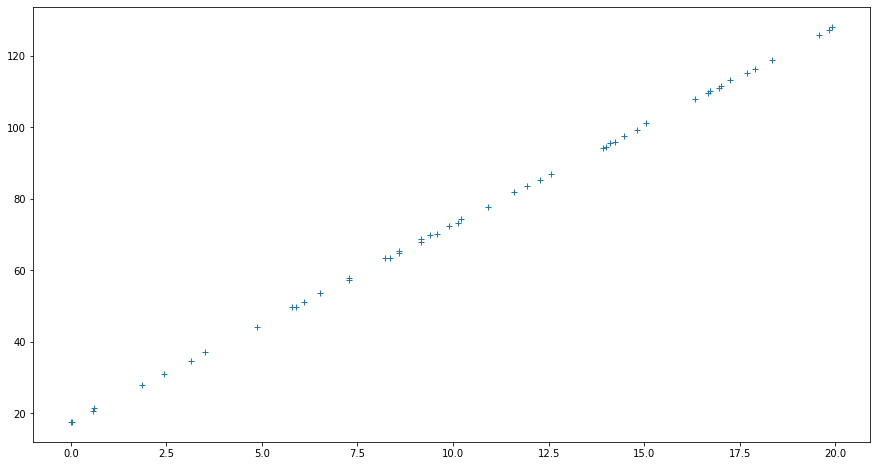

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#création de données aléatoires pour les valeurs de x et y
x_i = stats.uniform.rvs(loc=0,scale=20,size=50)
x_i0=np.sort(x_i)
x_i=x_i0
y_i0 = stats.uniform.rvs(loc=4,scale=2)*x_i+stats.uniform.rvs(loc=16,scale=2)
#on rajoute artificiellement un peu de bruit pour ne pas avoir une corrélation parfaite
y_i = y_i0 + stats.uniform.rvs(loc=-0.5,scale=1,size=50)

#nombre de points
n=x_i.size

#tracé des points correspondants
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])

ax1.plot(x_i,y_i,marker='+',ls='')


On va maintenant définir la fonction $\chi'(A,B;x_i,y_i)$ dont les variables sont $A$ et $B$. les $x_i$ et les $y_i$ étant des paramètres. 

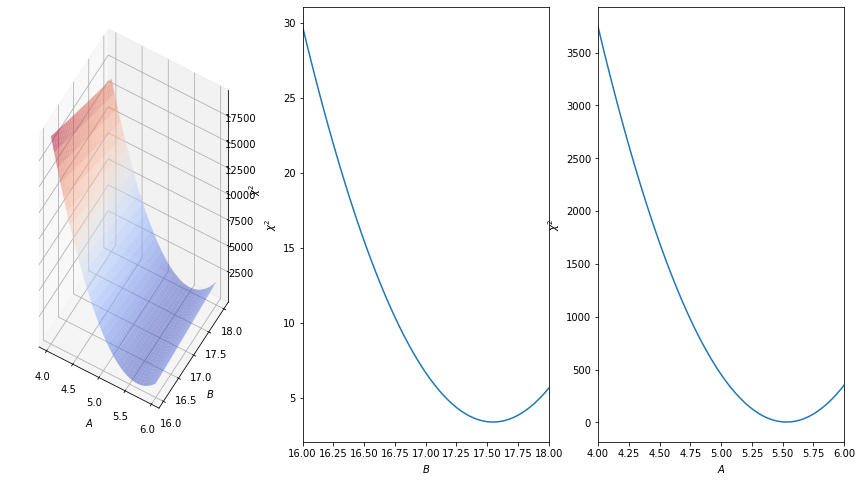

In [2]:
%matplotlib widget
%matplotlib inline
def chi(A,B,x_i,y_i):
    #alpha[0] = A
    #alpha[1] = B
    if type(A)==np.ndarray and type(B)==np.ndarray and A.ndim == B.ndim:
        Ashaped = np.expand_dims(A,A.ndim)
        Bshaped = np.expand_dims(B,B.ndim)
        x_ishaped = np.expand_dims(x_i,(0,1))
        y_ishaped = np.expand_dims(y_i,(0,1))
        return np.sum((y_ishaped-Ashaped*x_ishaped -Bshaped)**2,axis=2)
    else:
        return np.sum((y_i-A*x_i -B)**2)

    
    
#Nous allons maintenant tracer cette fonction en 3 dimensions
As = np.linspace(4,6,101)
Bs = np.linspace(16,18,101)
AAs,BBs = np.meshgrid(As,Bs)
Chis =  chi(AAs,BBs,x_i,y_i)

#Calculs des valeurs de A et B qui minimisent la dérivée dans les deux directions
AminsA = (np.sum(x_i*y_i)-Bs*np.sum(x_i))/np.sum(x_i**2)
BminsA = (np.sum(x_i*y_i)-As*np.sum(x_i**2))/np.sum(x_i)

AminsB = (np.sum(y_i)-Bs*x_i.size)/np.sum(x_i)
BminsB = (np.sum(y_i)-As*np.sum(x_i))/x_i.size


#affichage en 3D, 
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 3,hspace=0.25)
ax1 = fig.add_subplot(gs[0,0], projection='3d', proj_type='ortho')
ax1.plot_surface(AAs, BBs,Chis, cmap=cm.coolwarm,zorder=-1,alpha=.5)
ax1.set_xlabel('$A$')
ax1.set_ylabel('$B$')
ax1.set_zlabel('$\chi^2$')
#vue en coupe pour B, on prend les valeurs de A qui minimisent le chi^2 selon A
ax2 = fig.add_subplot(gs[0,1])
ax2.plot(Bs,np.squeeze(chi(AminsA,Bs,x_i,y_i)))
ax2.set_xlabel('$B$')
ax2.set_ylabel('$\chi^2$')
ax2.set_xlim(16,18)
#vue en coupe pour A, on prend les valeurs de B qui minimisent le chi^2 selon B
ax3 = fig.add_subplot(gs[0,2])
ax3.plot(As,np.squeeze(chi(As,BminsB,x_i,y_i)))
ax3.set_xlabel('$A$')
ax3.set_ylabel('$\chi^2$')
ax3.set_xlim(4,6)
plt.show()

Il est maintenant possible d'avoir une bonne estimation des valeurs de $A$ et $B$ qui minimisent la fonction.

## Détemination des valeurs de A et B
Nous allons maintenant utiliser les formules qui nous permettent de calculer les valeurs optimales et comparer aux valeurs données par différentes fonctions « automatiques » de python.
\begin{align}
  \Delta ={}& n\sum_i x_i^{2}-\left( \sum_i x_i \right)^{2}\\
 A={}&\dfrac{\displaystyle n\sum_i x_i × y_i-\sum_i x_i\sum_i y_i}{\Delta}\\
 B={}&\dfrac{\displaystyle -\sum_i x_i\sum_i x_iy_i+\sum_i x_i^{2}\sum_i y_i}{\Delta}
\end{align}

In [3]:
Delta = n*np.sum(x_i**2)-np.sum(x_i)**2
Aman = (n*np.sum(x_i*y_i)-np.sum(x_i)*np.sum(y_i))/Delta
Bman = (-np.sum(x_i)*np.sum(x_i*y_i)+np.sum(x_i**2)*np.sum(y_i))/Delta
print('Calculé de manière pédestre : A {:.3f} B {:.3f}'.format(Aman,Bman))

Calculé à la main : A 5.531 B 17.547


On va ici utiliser la fonction **np.polyfit** et comparer aux résultats obtenus de manière explicite.

In [4]:
Apolyfit,Bpolyfit = np.polyfit(x_i,y_i,1)
print('Calculé avec polyfit : A {:.3f} B {:.3f}'.format(Apolyfit,Bpolyfit))
print('différence : sur A {} sur B {}'.format(Apolyfit-Aman,Bpolyfit-Bman))

Calculé avec polyfit : A 5.531 B 17.547
différence : sur A 8.881784197001252e-16 sur B -3.552713678800501e-14


On voit ainsi que les formules vues dans le polycopié correspondent aux grandeurs calculées sous forme de « boîte noire » dans la fonction dédiée.

Avec la fonction **least_squares** de scipy qui utilise un algorithme plus sophistiqué, mais numérique, qui est applicable pour minimiser des fonction plus complexes.

In [5]:
def zeroChi(x,x_i,y_i):
    A=x[0]
    B=x[1]
    return y_i-(A*x_i+B)
res = scipy.optimize.least_squares(zeroChi, np.array([4,16]), args=(x_i,y_i))
Aleast,Bleast=res.x
print('Calculé avec least_squares : A {:.3f} B {:.3f}'.format(Aleast,Bleast))
print('différence : sur A {} sur B {}'.format(Aleast-Aman,Bleast-Bman))

Calculé avec least_squares : A 5.531 B 17.547
différence : sur A -1.6676544589699915e-09 sur B 7.3607679951237515e-09


## Vérification des résultats trouvés

Maintenant, nous allons tracer la fonction optimale trouvée et les résidus (écart entre les points réels et le modèle). Il faut **toujours** regarder si les résidus sont distribués aléatoirement autour de zéro.

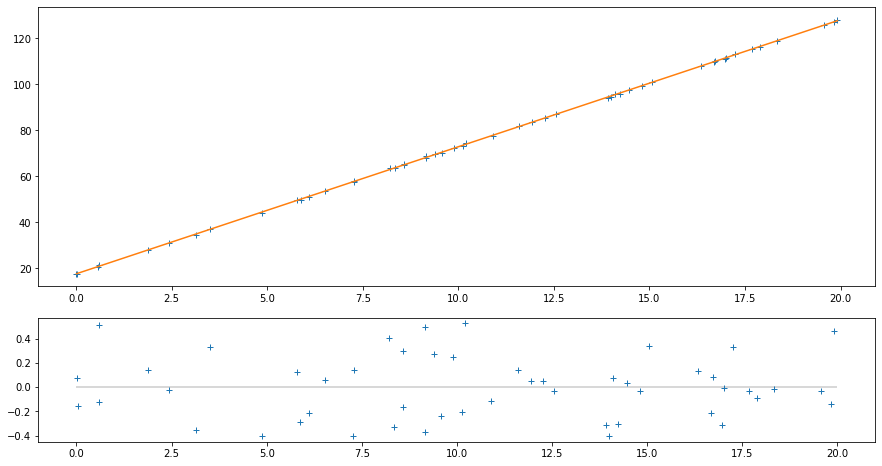

In [6]:
#tracé des points correspondants
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(3, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0:2,0])
#points bruts
ax1.plot(x_i,y_i,marker='+',ls='') 
#Droite optimale
ax1.plot(np.sort(x_i),Aman*np.sort(x_i)+Bman,ls='-') 
ax2 = fig.add_subplot(gs[2,0])
ax2.hlines(0,0,20,color='#cccccc')
#résidus
ax2.plot(x_i,y_i-(Aman*x_i+Bman),marker='+',ls='') 

On peut maintenant essayer de calculer l'écart-type pour essayer d'estimer les incertitudes sur les $y_i$.

In [7]:
sigma_y = np.sqrt(1/(n-2)*np.sum((y_i-(Aman*x_i+Bman))**2))
print('incertitude-type estimée à partir de l\'écart au modèle {}'.format(sigma_y))
sigma_theo=0.5/np.sqrt(3)
print('incertitude-type théorique {}'.format(sigma_theo))

incertitude-type estimée à partir de l'écart au modèle 0.2651588220294413
incertitude-type théorique 0.2886751345948129


# Régression linéaire avec incertitude connue sur les $y_i$

On reprend les mêmes points que précédemment, mais on va maintenant leur associer des incertitudes connues.

<ErrorbarContainer object of 3 artists>

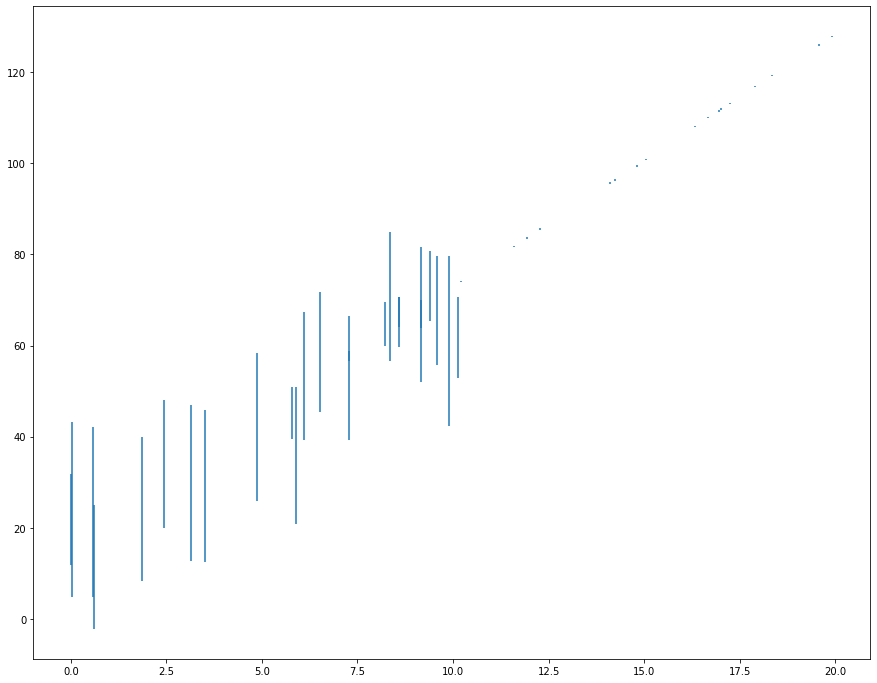

In [8]:
#génération d'incertitude sur les y_i, on les prend plus grandes sur la première moitié des points 
sig_i= np.zeros_like(y_i)
sig_i[0:25]=stats.uniform.rvs(loc=0,scale=10,size=25)
sig_i[-25:]=stats.uniform.rvs(loc=0,scale=0.1,size=25)
y_i = y_i0 + stats.norm.rvs(loc=0,scale=sig_i,size=50)
#tracé des points correspondants
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(1, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
#tracé avec incertitude, les intervalles de confiance sont à 95.45%
ax1.errorbar(x_i,y_i,yerr=2*sig_i,ls='')

On peut maintenant calculer les grandeurs correspondantes :
\begin{align}
\Delta ={}& \sum_i \dfrac{1}{\sigma_i^2}\sum_i \dfrac{ x_i^{2}}{\sigma_i^2}-\left( \sum_i \dfrac{ x_i}{\sigma_i^2} \right)^{2}\\
 A={}&\displaystyle \dfrac{1}{\Delta} \left( \sum_i \dfrac{1}{\sigma_i^2}\sum_i \dfrac{x_i × y_i}{\sigma_i^2}-\sum_i \dfrac{x_i}{\sigma_i^2}\sum_i \dfrac{y_i}{\sigma_i^2}\right) \\
 B={}&\dfrac{1}{\Delta}\left(\displaystyle -\sum_i \dfrac{x_i}{\sigma_i^2}\sum_i \dfrac{x_iy_i}{\sigma_i^2}+\sum_i \dfrac{x_i^{2}}{\sigma_i^2}\sum_i \dfrac{y_i}{\sigma_i^2}  \right)
\end{align}

In [9]:
Delta = np.sum(1/sig_i**2)*np.sum(x_i**2/sig_i**2)-np.sum(x_i/sig_i**2)**2
Amansig = (np.sum(1/sig_i**2)*np.sum(x_i*y_i/sig_i**2)-np.sum(x_i/sig_i**2)*np.sum(y_i/sig_i**2))/Delta
Bmansig = (-np.sum(x_i/sig_i**2)*np.sum(x_i*y_i/sig_i**2)+np.sum(x_i**2/sig_i**2)*np.sum(y_i/sig_i**2))/Delta
print('Calculé de manière pédestre : A {:.3f} B {:.3f}'.format(Amansig,Bmansig))

Calculé à la main : A 5.536 B 17.562


On peut comparer au résultat de la fonction **polyfit** à laquelle on a donné  les poids correspondants. 

In [10]:
Apolyfitsig,Bpolyfitsig = np.polyfit(x_i,y_i,1,w=1/sig_i)
print('Calculé avec polyfit : A {:.3f} B {:.3f}'.format(Apolyfitsig,Bpolyfitsig))
print('différence : sur A {} sur B {}'.format(Apolyfitsig-Amansig,Bpolyfitsig-Bmansig))

Calculé avec polyfit : A 5.536 B 17.562
différence : sur A 3.375077994860476e-14 sur B 3.588240815588506e-12


In [11]:
def zeroChi(x,x_i,y_i,sig_i):
    A=x[0]
    B=x[1]
    return (y_i-(A*x_i+B))/sig_i
res = scipy.optimize.least_squares(zeroChi, np.array([4,16]), args=(x_i,y_i,sig_i))
Aleastsig,Bleastsig=res.x
print('Calculé avec least_squares : A {:.3f} B {:.3f}'.format(Aleastsig,Bleastsig))
print('différence : sur A {} sur B {}'.format(Aleastsig-Amansig,Bleastsig-Bmansig))

Calculé avec least_squares : A 5.536 B 17.562
différence : sur A 3.056221942188131e-12 sur B -5.5852211744422675e-11


On voit ainsi que les formules vues dans le polycopié correspondent aux grandeurs calculées sous forme de « boîte noire » dans les deux fonctions utilisées ci-dessus.

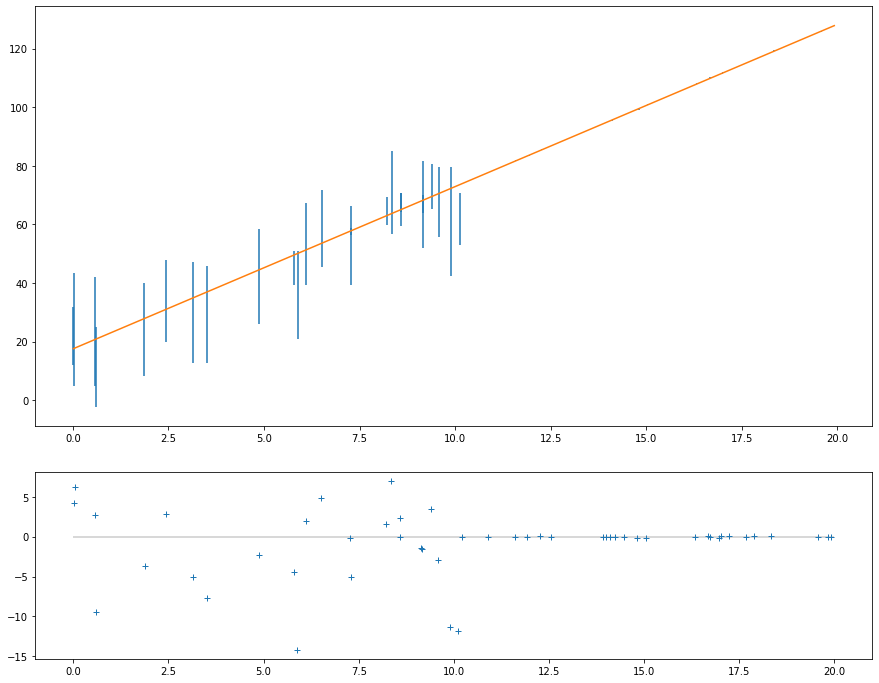

In [12]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(3, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0:2,0])
#tracé avec incertitude, les intervalles de confiance sont à 95.45%
ax1.errorbar(x_i,y_i,yerr=2*sig_i,ls='')
#points modélisés
ax1.plot(x_i,np.polyval([Apolyfitsig,Bpolyfitsig],x_i),ls='-')
#résidus
ax2 = fig.add_subplot(gs[2,0])
ax2.hlines(0,0,20,color='#cccccc')
ax2.plot(x_i,y_i-np.polyval([Apolyfitsig,Bpolyfitsig],x_i),marker='+',ls='') 

## Comparaison avec une régression simple
On peut comparer nos résultats avec ceux obtenus par une régression simple.

In [13]:
Apolyfit,Bpolyfit = np.polyfit(x_i,y_i,1)
print('Calculé sans incertitude : A {:.3f} B {:.3f}'.format(Apolyfit,Bpolyfit))
print('différence : sur A {} sur B {}'.format(Apolyfitsig-Apolyfit,Bpolyfitsig-Bpolyfit))

Calculé sans incertitude : A 5.624 B 15.747
différence : sur A -0.08837967500942501 sur B 1.8156346099262937


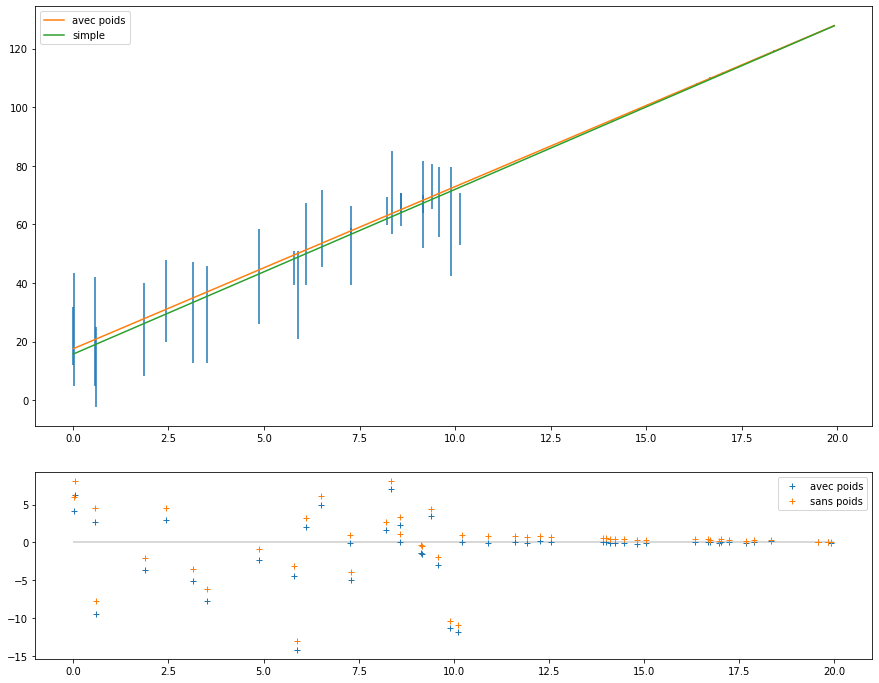

In [14]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(3, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0:2,0])

ax1.errorbar(x_i,y_i,yerr=2*sig_i,ls='')
ax1.plot(x_i,np.polyval([Apolyfitsig,Bpolyfitsig],x_i),ls='-',label='avec poids')
ax1.plot(x_i,np.polyval([Apolyfit,Bpolyfit],x_i),ls='-',label='simple')
ax1.legend()
#résidus
ax2 = fig.add_subplot(gs[2,0])
ax2.hlines(0,0,20,color='#cccccc')
ax2.plot(x_i,y_i-np.polyval([Apolyfitsig,Bpolyfitsig],x_i),marker='+',ls='',label='avec poids') 
ax2.plot(x_i,y_i-np.polyval([Apolyfit,Bpolyfit],x_i),marker='+',ls='',label='sans poids') 

ax2.legend()

Normalement, la méthode qui prend en compte les incertitudes devrait avoir des résidus sensiblements plus grand que celle qui n'en tint pas compte pour les 25 premiers point mais des résidus plus petits pour les 25 derniers.

# Régression linéaire avec incertitude sur les $x_i$ et $y_i$
On va cette fois-ci ajouter des incertitudes sur les $x_i$.

<ErrorbarContainer object of 3 artists>

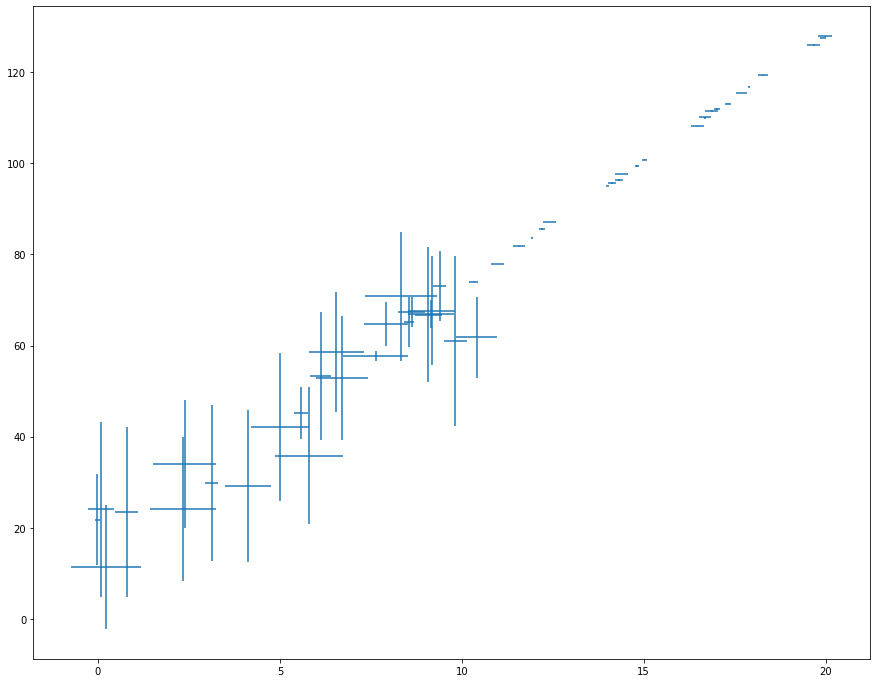

In [17]:
#génération d'incertitude sur les y_i, on les prend plus grandes sur la première moitié des points 
sig_ix= np.zeros_like(y_i)
sig_ix[0:25]=stats.uniform.rvs(loc=0,scale=0.5,size=25)
sig_ix[-25:]=stats.uniform.rvs(loc=0,scale=0.1,size=25)
x_i = x_i0+ stats.norm.rvs(loc=0,scale=sig_ix,size=50)
#tracé des points correspondants
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(1, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
#tracé avec incertitude, les intervalles de confiance sont à 95.45%
ax1.errorbar(x_i,y_i,yerr=2*sig_i,xerr=2*sig_ix,ls='')

On va minimiser le carré de la fonction qui pondère en fonction des deux incertitudes avec python.

In [22]:
import scipy.optimize as spopt

#fonction dont le carré est à minimiser
def residuals(p, y, x,x_inc,y_inc):
    """
    Function to minimize
        p paramters
        x x values
        x_inc uncertainty on x
        y_inc uncertainty on y
    """
    A=p[0]
    B=p[1]
    err = (y-p[0]*x-p[1])/np.sqrt(y_inc**2 + (A*x_inc)**2)
    return err


result=spopt.leastsq(residuals,[4,16],args=(y_i, x_i,sig_ix,sig_i),Dfun=None, full_output=1)
popt = result[0]
Aboth,Bboth = popt
print(popt)

[ 5.53679666 17.55124219]
5.536796658209898


On peut maintenant vérifier le fit, ici, il faut voir que l'objectif est de faire passer la droite au plus près de  **l'ellipsoïde** dont les deux axes principaux sont donnés par les barres d'incertitude.

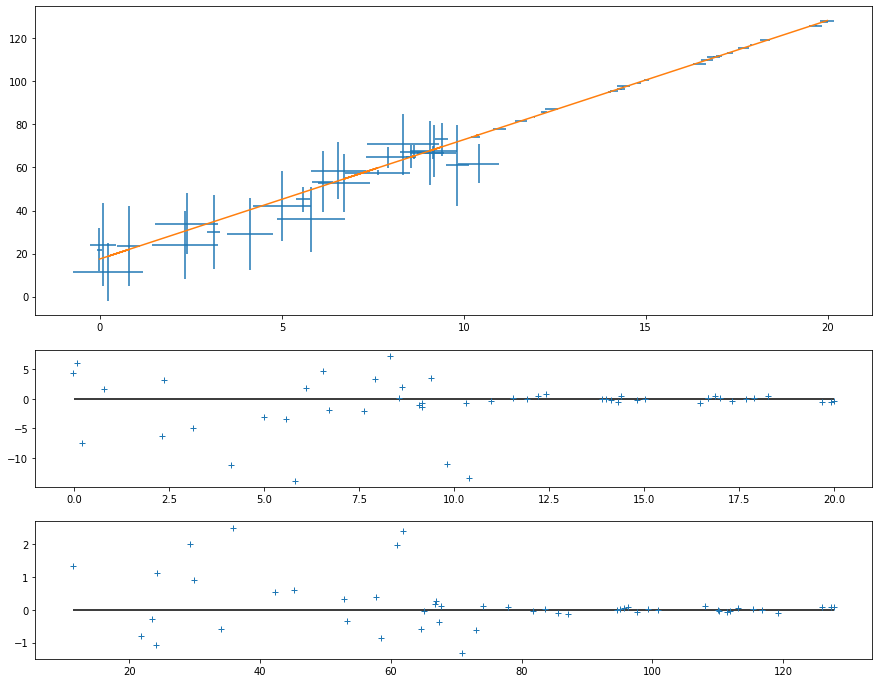

In [30]:
#tracé des points correspondants
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(4, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0:2,0])
#tracé avec incertitude, les intervalles de confiance sont à 95.45%
ax1.errorbar(x_i,y_i,yerr=2*sig_i,xerr=2*sig_ix,ls='')
ax1.plot(x_i,Aboth*x_i+Bboth)
#résidus selon y
ax2 = fig.add_subplot(gs[2,0])
ax2.plot(x_i,y_i-Aboth*x_i-Bboth,ls='',marker='+')
ax2.hlines(0,0,20)
#résidus selon x
ax3 = fig.add_subplot(gs[3,0])
ax3.plot(y_i,x_i-(y_i-Bboth)/Aboth,ls='',marker='+')
ax3.hlines(0,np.min(y_i),np.max(y_i))